<h1>Activity: Dictionaries and sets</h1>

## Introduction

In this lab, you will practice creating, modifying, and working with data structures in Python. This will develop your knowledge of different kinds of data structures and the different operations that you can perform with them to answer questions about the data. This will help you prepare for projects you may encounter where you will need to use data structures to store and keep track of data.

In your work as an analyst, you are continuing your research into air quality data collected by the U.S. Environmental Protection Agency (EPA). The air quality index (AQI) is a number that runs from 0 to 500. The higher the AQI value, the greater the level of air pollution and the greater the health concern. For example, an AQI value of 50 or below represents good air quality, while an AQI value over 300 represents hazardous air quality. Refer to this guide from [AirNow.gov](https://www.airnow.gov/aqi/aqi-basics/) for more information.

In this activity, you will create, modify, and update dictionaries and sets. You will also be working with more data than in previous labs to more closely resemble situations encountered by working data professionals.

# Task 1: Create a dictionary to store information</h2></summary>

Dictionaries are useful when you need a data structure to store information that can be referenced or looked up.

In this task you'll begin with three `list` objects:

* `state_list` - an ordered list of the state where each data point was recorded
* `county_list` - an ordered list of the county where each data point was recorded
* `aqi_list` - an ordered list of AQI records

As a refresher, here is an example table of some of the information contained in these variables:

| state_name | county_name | aqi |
| --- | --- | --- |
| Arizona | Maricopa | 9 |
| California | Alameda | 11 |
| California | Sacramento | 35 |
| Kentucky | Jefferson | 6 |
| Louisiana | East Baton Rouge | 5 |


</details>

**Reminder:** This lab uses more data than the last one. This table is just a small sample of the information contained in the three lists that are provided for this activity. 

## 1a: Create a list of tuples

Begin with an intermediary step to prepare the information to be put in a dictionary.

* Convert `state_list`, `county_list`, and `aqi_list` to a list of tuples, where each tuple contains information for a single record: `(state, county, aqi)`.

* Assign the result to a variable called `epa_tuples`.



In [41]:
# RUN THIS CELL TO IMPORT YOUR DATA
import pandas as pd

# LAB-107, LAB-108
def fetch_epa(key):  
    '''
    Imports EPA data from csv and creates a dictionary with three keys:
        state: a list of the states
        county: a list of the counties
        aqi: a list of the aqi
    
    Returns the values at a given key.
    '''
    epa = pd.read_csv('c2_epa_air_quality.csv')
    state = epa['state_name'].to_list()
    county = epa['county_name'].to_list()
    aqi = epa['aqi'].to_list()
    epa_dict = dict(state = state,
                    county = county,
                    aqi = aqi)
    
    return epa_dict[key]

state_list = fetch_epa('state')
county_list = fetch_epa('county')
aqi_list = fetch_epa('aqi')

In [42]:
# 1. Convert `state_list`, `county_list`, and `aqi_list` to a list of tuples, 
# where each tuple contains information for a single record: `(state, county, aqi)`.
# 2. Assign the result to a variable called `epa_tuples`.

epa_tuples = []

# Long-form approach: Iterating over the lists.
for i in range(len(state_list)):
    epa_tuples.append(
        (state_list[i],county_list[i],aqi_list[i])
    )

# Short-form approach: Using the zip function.
epa_tuples_zipped = list(zip(state_list, county_list, aqi_list))

# Testing that the zip function was used correctly.
if epa_tuples == epa_tuples_zipped:
    print('Lists are the same, success!\n')
else:
    print(f'Lists are not the same, try again.\n{epa_tuples_zipped}')
    
print('EPA Tuples list:')

epa_tuples



Lists are the same, success!

EPA Tuples list:


[('Arizona', 'Maricopa', 18.0),
 ('Arizona', 'Maricopa', 9.0),
 ('Arizona', 'Pima', 20.0),
 ('California', 'Alameda', 11.0),
 ('California', 'Butte', 6.0),
 ('California', 'Fresno', 11.0),
 ('California', 'Kern', 7.0),
 ('California', 'Kern', 3.0),
 ('California', 'Kern', 7.0),
 ('California', 'Los Angeles', 13.0),
 ('California', 'Los Angeles', 18.0),
 ('California', 'Mono', 5.0),
 ('California', 'Sacramento', 35.0),
 ('California', 'San Bernardino', 18.0),
 ('California', 'San Diego', 23.0),
 ('California', 'Santa Barbara', 0.0),
 ('California', 'Shasta', 11.0),
 ('Colorado', 'El Paso', 9.0),
 ('Florida', 'Duval', 15.0),
 ('Florida', 'Duval', 13.0),
 ('Florida', 'Hillsborough', 19.0),
 ('Hawaii', 'Honolulu', 10.0),
 ('Illinois', 'Sangamon', 20.0),
 ('Indiana', 'Marion', 32.0),
 ('Kentucky', 'Henderson', 8.0),
 ('Kentucky', 'Jefferson', 6.0),
 ('Kentucky', 'McCracken', 13.0),
 ('Kentucky', 'McCracken', 13.0),
 ('Louisiana', 'East Baton Rouge', 5.0),
 ('Maryland', 'Baltimore (City)', 3

## 1b: Create a dictionary

Now that you have a list of tuples containing AQI records, use it to create a dictionary that allows you to look up a state and get all the county-AQI pairs associated with that state.

* Create a dictionary called `aqi_dict`:
    * Use a loop to unpack information from each tuple in `epa_tuples`.
    * Your dictionary's keys should be states.
    * The value at each key should be a list of tuples, where each tuple is a county-AQI pair of a record from a given state.

*Example:*
```
[IN]  aqi_dict['Vermont']
[OUT] [('Chittenden', 18.0),
       ('Chittenden', 20.0),
       ('Chittenden', 3.0),
       ('Chittenden', 49.0),
       ('Rutland', 15.0),
       ('Chittenden', 3.0),
       ('Chittenden', 6.0),
       ('Rutland', 3.0),
       ('Rutland', 6.0),
       ('Chittenden', 5.0),
       ('Chittenden', 2.0)]
```

In [43]:
aqi_dict = {}

#  Use a loop to unpack information from each tuple in epa_tuples.
for tuple in epa_tuples:
    state = tuple[0]
    county = tuple[1]
    aqi = tuple[2]
    
    # If the state is a key in the dictionary, update the values. Else, add it as a new key.
    if state in aqi_dict:
        aqi_dict[state] += [(county, aqi)]
    else:
        aqi_dict[state] = [(county, aqi)]
        
aqi_dict['Vermont']

[('Chittenden', 18.0),
 ('Chittenden', 20.0),
 ('Chittenden', 3.0),
 ('Chittenden', 49.0),
 ('Rutland', 15.0),
 ('Chittenden', 3.0),
 ('Chittenden', 6.0),
 ('Rutland', 3.0),
 ('Rutland', 6.0),
 ('Chittenden', 5.0),
 ('Chittenden', 2.0)]

# Task 2: Use the dictionary to retrieve information

Now that you have a dictionary of county-AQI readings by state, you can use it to retrieve information and draw further insight from your data.

## 2a: Calculate how many readings were recorded in the state of Arizona

Use your Python skills to calculate the number of readings that were recorded in the state of Arizona.

*Expected output:*
```
[OUT] 72
```

In [44]:
num_readings_az = len(aqi_dict['Arizona'])

print(f'There were {num_readings_az} readings recorded in the state of Arizona.')

There were 72 readings recorded in the state of Arizona.


## 2b: Calculate the mean AQI from the state of California

Use your Python skills to calculate the mean of the AQI readings that were recorded in the state of California. Note that there are many different approaches you can take. Be creative!

*Expected output:*
```
[OUT] 9.412280701754385
```

In [45]:
aqi_readings_ca = aqi_dict['California']

num_aqi_readings_ca = len(aqi_readings_ca)
sum_aqi_readings_ca = 0

for reading in aqi_readings_ca:
    sum_aqi_readings_ca += reading[1]

mean_aqi_ca = sum_aqi_readings_ca / num_aqi_readings_ca

print(f'California\'s mean AQI reading: {mean_aqi_ca}')

California's mean AQI reading: 9.412280701754385


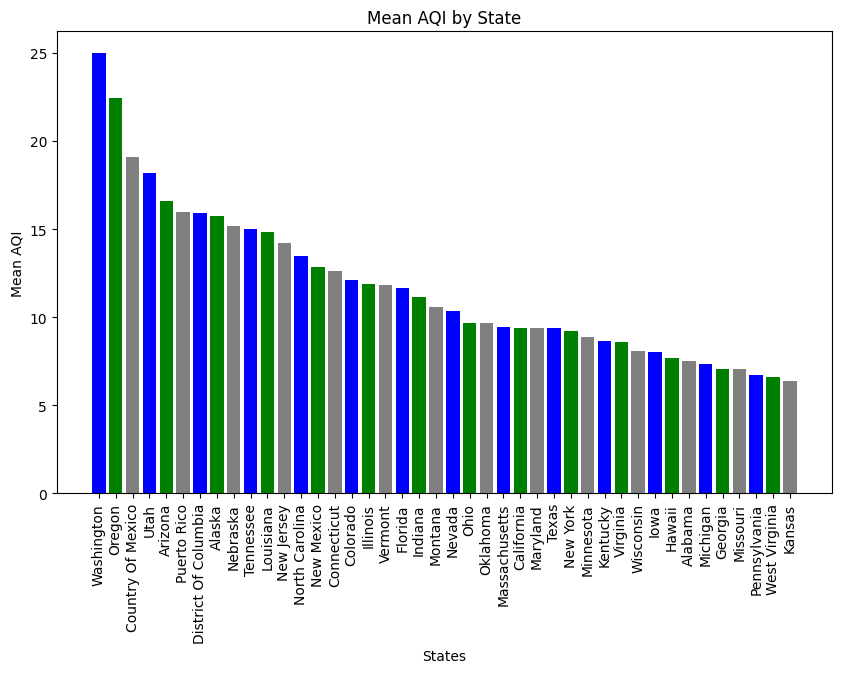

In [46]:
# My own extra credit initiative!
# Plot mean AQI by state in descending order, with alternating colors.

import matplotlib.pyplot as plt
import operator

data = {}

for state in aqi_dict:
    aqi_readings = aqi_dict[state]

    num_aqi_readings = len(aqi_readings)
    sum_aqi_readings = 0

    for reading in aqi_readings:
        sum_aqi_readings += reading[1]

    mean_aqi = sum_aqi_readings / num_aqi_readings
    
    data[state] = mean_aqi

# Sort the items in descending order of mean AQI.
data = dict(sorted(data.items(),key=operator.itemgetter(1),reverse=True))

# Alternating color sequence for the bar chart.
colors = ['blue','green','grey']
bar_colors = [colors[i%len(colors)] for i in range(len(data))] # Use modulus to wrap around the list.

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(data.keys(), data.values(), color=bar_colors)
plt.xlabel('States')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('Mean AQI by State')
plt.show()

# Task 3: Define a `county_counter()` function

You want to be able to quickly look up how many times a county is represented in a given state's readings. Even though you already have a list containing just county names, it's not safe to rely on the counts from that list alone because some states might have counties with the same name. Therefore, you'll need to use the state-specific information in `aqi_dict` to calculate this information.

## 3a: Write the function

* Define a function called `county_counter` that takes one argument:
    * `state` - a string of the name of a U.S. state

* Return `county_dict` - a `dictionary` object whose keys are counties of the `state` given in the function's argument. For each county key, the corresponding value should be the count of the number of times that county is represented in the AQI data for that state.

*Example:*
```
[IN]  county_counter('Florida')
[OUT] {'Duval': 13,
       'Hillsborough': 9,
       'Broward': 18,
       'Miami-Dade': 15,
       'Orange': 6,
       'Palm Beach': 5,
       'Pinellas': 6,
       'Sarasota': 9}
```

**NOTE:** Depending on the version of Python you're using, the order of the items returned by a dictionary can vary, so it's possible that your keys might not print in the same order as listed above. However, the key-value pairs themselves will be the same if you do the exercise successfully.

In [47]:
def county_counter(state):
    county_dict = {}
    for state_name in aqi_dict:
        if state_name == state:
            county_aqi_list = aqi_dict[state]
            for county_tuple in county_aqi_list:
                county = county_tuple[0]
                if county in county_dict:
                    county_dict[county] += 1
                else:
                    county_dict[county] = 1
    return county_dict

county_counter('Florida')

{'Duval': 13,
 'Hillsborough': 9,
 'Broward': 18,
 'Miami-Dade': 15,
 'Orange': 6,
 'Palm Beach': 5,
 'Pinellas': 6,
 'Sarasota': 9}

## 3b: Use the function to check Washington County, PA.

Use the `county_counter()` function to calculate how many AQI readings were from `Washington` County, `Pennsylvania`.

*Expected result:*
```
[OUT] 7
```

In [48]:
pa_counties = county_counter('Pennsylvania')

pa_counties['Washington']

7

## 3c: Use the function to check the different counties in Indiana

Use the `county_counter` function to obtain a list of all the different counties in the state of Indiana.

*Expected result:*
```
[OUT] dict_keys(['Marion', 'St. Joseph', 'Vanderburgh', 'Allen', 'Vigo'
      'Hendricks', 'Lake'])
```

**NOTE:** Depending on the version of Python you're using, the order of the items returned by a dictionary can vary, so it's possible that your keys might not print in this same order as listed above. However, the key-value pairs themselves will be the same if you do the exercise successfully.

In [49]:
county_counter('Indiana').keys()

dict_keys(['Marion', 'St. Joseph', 'Vanderburgh', 'Allen', 'Vigo', 'Hendricks', 'Lake'])

# Task 4: Use sets to determine how many counties share a name

In this task, you'll create a list of every county from every state, then use it to determine how many counties have the same name.

## 4a: Construct a list of every county from every state

1.  * Use `aqi_dict` and `county_counter()` to construct a list of every county from every state.
    * Assign the result to a variable called `all_counties`.

2. Find the length of `all_counties`.

*Expected result:*
```
[OUT] 277
```

In [51]:
all_counties = []

for state in aqi_dict:
    counties = county_counter(state).keys()
    all_counties += counties

len(all_counties)
    

277

## 4b: Calculate how many counties share names

Use `all_counties` and your knowledge of sets and list methods to determine how many counties share names.

*Expected result:*
```
[OUT] 41
```

In [72]:
unique_counties = set(all_counties)

# Create a dict of counts so that lookup of counts becomes an O(1) operation, instead of O(n).
shared_county_counts = {}

for county in unique_counties:
    shared_county_counts[county] = all_counties.count(county)

num_shared_county_names = 0

for county in shared_county_counts:
    if shared_county_counts[county] > 1:
        num_shared_county_names += 1

num_shared_county_names

18

<details><summary><h4>Hint 1</h4></summary>

Refer to what you've learned about sets and review the list methods provided in [Reference guide: Lists](https://www.coursera.org/learn/get-started-with-python/supplement/5lejs/reference-guide-lists).

</details>

<details><summary><h4>Hint 2</h4></summary>

- A set cannot contain any duplicate elements. Each value is unique.
- Which list method returns the number of times an element occurs in a list?

</details>

<details><summary><h4>Hint 3</h4></summary>

1. Instantiate a counter with an initial value of `0` to record the number of counties with shared names. 
    
2. Loop over each unique county name in `all_counties`. (Use the `set()` function to get unique names.)

3. For each iteration of the loop, use the `count()` list method to determine how many counties in `all_counties` have that county name.

4. If the number of counties with that name is more than one, add that number to the counter (from step 1).

</details>

Note that this doesn't tell you how many *different* county names were duplicated. Further analysis could uncover more details about this. Perhaps you can figure it out!

## Conclusion

**What are your key takeaways from this lab?**

[Double-click to record your response here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 